In [1]:
#! pip install nltk
#! pip install emot
#! pip install wordcloud
#! pip install ko-ww-stopwords

In [1]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#Korean stopwords
# from ko_ww_stopwords.stop_words import ko_ww_stop_words 
# from ko_ww_stopwords.tools import is_stop_word, strip_outer_punct

from wordcloud import STOPWORDS, WordCloud
from emot.emo_unicode import UNICODE_EMOJI
import pandas as pd

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [26]:

lemmatizer = WordNetLemmatizer()
# kor_stop_words = list(ko_ww_stop_words)
emoji = list(UNICODE_EMOJI.keys())

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    
    #removing #'s
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)    
#     # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+','',text)
    #removing punctuatuon and numbers
    text = ''.join(char for char in text if not char.isdigit())
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    
    #tokenizing words and removing stop words from text
    tokens = word_tokenize(text)
#     filtered_words = [w for w in tokens if w not in kor_stop_words]
    filtered_words = [w for w in tokens if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text


In [27]:
artist_id = "20022492"

In [28]:
df = pd.read_csv(f"./bugs_database/merged/{artist_id}_merged.csv")
df['Lyric'] = df['Lyric'].apply(clean_text)


In [46]:
stop_words = list(stopwords.words('english'))

manual_sw = ["n't", '내', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야'
             '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
            'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’']
#넌 난 어쩌구저쩌구 하는 것 부터가 사랑 노래라는 것을 시사하지 않나..

stop_words.extend(manual_sw)

df['Lyric'] = df['Lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [47]:
#전체 가사 합치기 -> 전반적인 정서는 무엇인가?
new = " ".join(cat for cat in df.Lyric)
new

'kick door waving coco 팝콘이나 챙겨 껴들 생각 말고 talk talk runway walk walk 눈 감고 pop pop 안 봐도 척 one one two two 손끝 툭 하나에 다 무너지는 중 가짜 쇼 치곤 화려했지 make sense couldnt get dollar outta 자 오늘 밤이야 독을 품은 꽃 혼을 빼앗은 다음 look made 천천히 잠재울 fire 잔인할 만큼 아름다워 bring pain like pink venom pink venom pink venom get em get em get em straight ya dome like whoa whoa whoa straight ya dome like taste pink venom taste pink venom taste pink venom get em get em get em straight ya dome like whoa whoa whoa straight ya dome like black paint ammo got body like rambo rest peace please light candle da life vandal masked im still celine designer crime wouldnt diamond shinin drive silence dont mind im ridin flyin private side side da pilot sky im wildin stylin chance cuz got body body like slow dance 자 오늘 밤이야 독을 품은 꽃 혼을 빼앗은 다음 look made 천천히 잠재울 fire 잔인할 만큼 아름다워 bring pain like pink venom pink venom pink venom get em get em get em straight ya dome like whoa whoa whoa straight ya dome like taste pink venom taste pink venom taste pink 

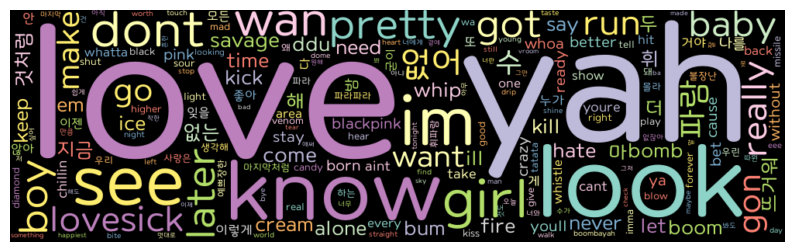

In [48]:

# mask = np.array(Image.open("./05.png"))
# 밑에 mask = mask 넣기, background_color="rgba(255, 255, 255, 0)", mode="RGBA"


word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 300, 
colormap='Set3', max_words=200, collocations = False).generate(new)


plt.figure(figsize = (10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [32]:
# wan - want / wanna

In [49]:
wordlist = new.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [43]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [50]:
dictionary = wordListToFreqDict(wordlist)
sorteddict = sortFreqDict(dictionary)


In [68]:
sorteddict_50

[(174, 'love'),
 (169, 'like'),
 (141, 'yah'),
 (100, 'look'),
 (95, 'know'),
 (68, 'see'),
 (67, 'im'),
 (67, 'girl'),
 (57, 'dont'),
 (53, 'wan'),
 (49, 'pretty'),
 (45, 'later'),
 (45, 'boy'),
 (44, 'get'),
 (43, 'got'),
 (43, 'baby'),
 (41, 'run'),
 (41, 'really'),
 (41, 'lovesick'),
 (40, '없어'),
 (36, '파람'),
 (36, 'gon'),
 (35, '수'),
 (35, 'want'),
 (35, 'savage'),
 (35, 'make'),
 (35, 'go'),
 (34, 'come'),
 (32, 'whip'),
 (32, 'never'),
 (32, 'bum'),
 (31, 'ice'),
 (31, 'fire'),
 (30, '더'),
 (30, 'ill'),
 (30, 'boom'),
 (29, 'time'),
 (29, 'em'),
 (28, 'ddu'),
 (27, '해'),
 (27, 'say'),
 (26, '지금'),
 (26, 'let'),
 (26, 'kick'),
 (26, 'keep'),
 (26, 'cream'),
 (26, 'bomb'),
 (25, '없는'),
 (25, '것처럼'),
 (25, 'need')]

In [71]:
sorteddict_50 = sorteddict[:25]

In [72]:
x_val = [x[1] for x in sorteddict_50]
y_val = [x[0] for x in sorteddict_50]

/Users/jiwonshin/.pyenv/versions/3.8.12/envs/g1jiwon/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.8.12/envs/g1jiwon/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.8.12/envs/g1jiwon/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.8.12/envs/g1jiwon/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.8.12/envs/g1jiwon/lib/python3.8/si

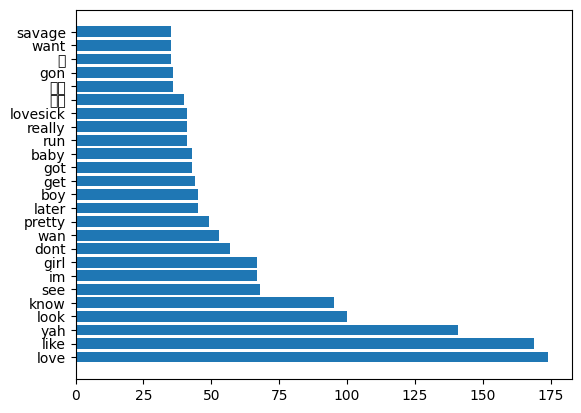

In [73]:
plt.barh(x_val, y_val)
plt.show()

In [74]:
sorteddict_50

[(174, 'love'),
 (169, 'like'),
 (141, 'yah'),
 (100, 'look'),
 (95, 'know'),
 (68, 'see'),
 (67, 'im'),
 (67, 'girl'),
 (57, 'dont'),
 (53, 'wan'),
 (49, 'pretty'),
 (45, 'later'),
 (45, 'boy'),
 (44, 'get'),
 (43, 'got'),
 (43, 'baby'),
 (41, 'run'),
 (41, 'really'),
 (41, 'lovesick'),
 (40, '없어'),
 (36, '파람'),
 (36, 'gon'),
 (35, '수'),
 (35, 'want'),
 (35, 'savage')]